In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.metrics import roc_auc_score

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [3]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0])

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 428ms/step - loss: 1.4275
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2584
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1226
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0130
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 0.9241
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 0.8516
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 0.7919
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 0.7425
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 0.7012
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6663
Epoch 11/300
1/1 [==============================] - 0s 6ms/step - loss: 0.6364
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 0.6107
Epoch 13/300
1/1 [==============================] - 0s 2ms/

In [4]:
model.predict([10.0])

1/1 [==============================] - 0s 434ms/step


array([[18.890173]], dtype=float32)

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

In [6]:
train_label, test_label

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

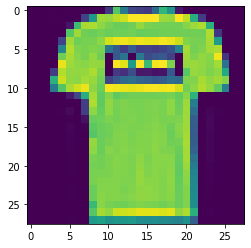

In [7]:
plt.imshow(train_img[1])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

pred = np.argmax(outputs)
print(f'class with highest probability: {pred}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_img, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 3.4059 - accuracy: 0.7356
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6180 - accuracy: 0.8000
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5328 - accuracy: 0.8194
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5157 - accuracy: 0.8259
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4912 - accuracy: 0.8348


In [11]:
model.evaluate(test_img, test_label)

313/313 [==============================] - 1s 998us/step - loss: 0.5191 - accuracy: 0.8355


[0.519088089466095, 0.8355000019073486]

In [14]:
train_img = train_img/255.0
test_img = test_img/255.0

# callback class 실행
callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_img, train_label, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8691
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5434
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4844
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4534
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4319


In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_enc(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training=True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),      # (64, (3,3)): 64 filters size of 3*3
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),      # dense layer: connects input and output
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

# it is important to look at 'Output Shape' column
# 4th line, (None, 5, 5, 64): 64 images size of 5*5

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense_3 (Dense)             (32, 512)                 401920    
                                                                 
 dense_4 (Dense)             (32, 10)                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
test_label[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

1/1 [==============================] - 0s 13ms/step


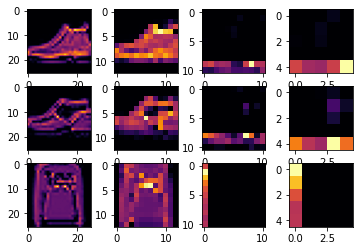

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

first_img = 0
second_img = 23
third_img = 1
conv_num = 0

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_img[first_img].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, :, :, conv_num], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_img[second_img].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, :, :, conv_num], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_img[third_img].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, :, :, conv_num], cmap='inferno')
    axarr[2,x].grid(False)

In [17]:
from scipy import misc
ascent_img = misc.ascent()

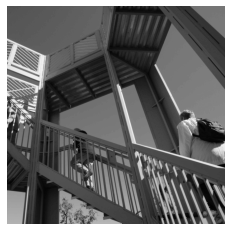

In [18]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_img)
plt.show()

In [19]:
import numpy as np

img_transformed = np.copy(ascent_img)

# get dimensions of img
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
optimizer=RMSprop(lr=0.001),
metrics=['accuracy'])

c:\Users\hoon9\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 이수안 컴퓨터연구소 강의

#### datatype 정의

In [32]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [33]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [34]:
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [35]:
# tf.cast: dtype 변환
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


#### Dense layer
- fully connected layer(완전연결층)
- 노드 수(유닛 수), activation function 등 지정
- name을 통해 레이어간 구분 가능
- 가중치 초기화(kernel initializer)
    - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용

In [36]:
tf.keras.layers.Dense(10, activation='softmax', name='Dense Layer')

In [37]:
tf.keras.layers.Dense(10, kernel_initializer='he_normal', name='Dense Layer')

- Flatten: 배치 크기(or 데이터 크기)를 제외하고 데이터를 1차원으로 펼치는 작업
    - e.g) (128, 3, 2, 2) -> (128, 12)

- Sequential: 모델을 순차적인 구조로 진행할 때 사용

In [47]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [51]:
model = Sequential([
    Input(shape=(28, 28)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
